## 엘리어싱_ 공부하는 방법 

\# 3. 경고가 나오는 원인은 view 와 copy의 차이때문입니다. 

해당 경고가 제 셋팅에서는 발생하지 않아서 정확한 안내는 어렵습니다. (이 노트북으로 제가 돌려보았을때는 아무 메시지가 안뜹니다) 

그래서 해당 경고를 제 환경에서 발생시켜보려고 파이썬버전과 판다스버전을 체크해서 학생과 맞출까했는데 카톡응답이 없으셔서 그냥 제가 생각을 정리해서 씁니다. 


view vs copy는 제가 맨 마지막 수업때 설명했던 에일리어싱에 대한 심화내용인데요,

아래와 같은 코드가 기억나실것입니다. 

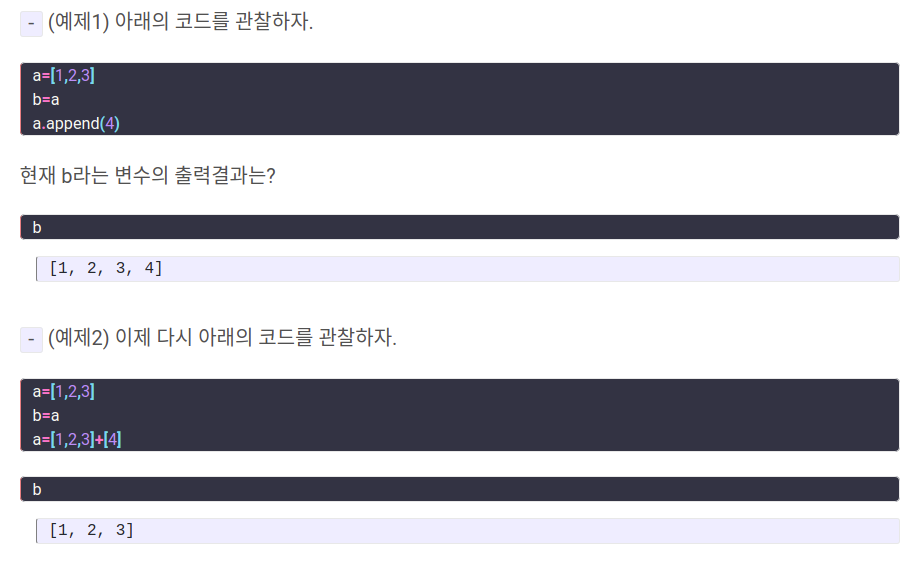

b=a 라고 했지만 a의 내용이 변경됨에 따라 b가 같이 변경될수도 있고 (veiw) 그렇지 않고 a,b가 독립적으로 행동할수도 (copy) 있는데요, 

데이터 프레임에서는 아래와 같습니다. 

In [102]:
import pandas as pd

In [107]:
testdf=pd.DataFrame({'a':[1,2,2,3,3],'b':[20,20,30,10,10]})

In [108]:
idx_=testdf.index[testdf['a']==2]

In [109]:
testdf.loc[idx_]['a']

1    2
2    2
Name: a, dtype: int64

In [110]:
testdf.loc[idx_]['a']=0
testdf

,a,b
0,1,20
1,2,20
2,2,30
3,3,10
4,3,10


이런식으로 원하는 값이 안바뀌어서 당황스러울 때도 있지만 

In [113]:
testdf['a'][idx_]=0

In [114]:
testdf

,a,b
0,1,20
1,0,20
2,0,30
3,3,10
4,3,10


방금경우처럼 의도한 대로 잘 바뀌는 경우도있죠 

대략적인 원리는 아래와 같습니다. 

`-` testdf에서 column을 select하거나 row를 filtering 할때 서브 dataframe 이 순간적으로 만들집니다. 이 데이터 프레임을 가칭 dftemp 라고 할게요 

`경우1` 이때 dftemp라는 변수를 새로운 메모리 공간에 일단 할당하고 (사본을 만든다고 합니다!) 거기서 수정할수도 있고요, (copy)

`경우2` testdf 가 저장된 메모리공간에서 index의 값만 뽑아서 기억해 놓고 (뷰를 만든다고 합니다!) 거기서 수정할 수 있겠죠.. (view)



`-` 강의내용으로 치면 메모리호텔의 1번방에 몇명의 사람들이 있는데 그중에서 특정조건을 만족하는 (a==2 라든가) 사람들만 뽑은 subset을 생각할때, 

`경우1` 그 subset 전체를 다른 메모리방(예를들면 2번방)에 복사하고 2번방의 내용을 수정할 수도 있고 (그럼 1번방내용은 그대로 유지)

`경우2` 1번방에서 특정조건을 만족하는 (a==2)의 번호만 기억했다가 1번방중 그 번호에 해당하는 값을 수정할 수도 있는거죠.(그럼 1번방 내용이 수정됨) 

**경고발생이유** 실제 컴퓨터는 경우1을 수행할지 경우2를 수행할지 모르기 때문에 한번확인해주는 겁니다. 

자세한 내용은 아래포스팅을 참고하시면 됩니다. 

https://realpython.com/pandas-settingwithcopywarning/

특히 이부분 잘 읽어보세요

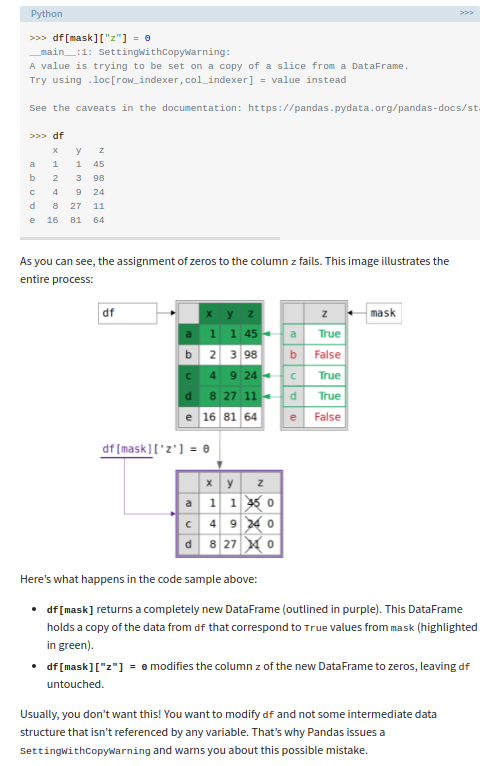

### 개인적인 생각 

R에서는 뷰와 사본을 사용자가 컨트롤할 수 있는 방법이 없지만 파이썬에서는 존재하기 때문에 생기는 문제입니다. 

그래서 잘 구분해줘야하죠

--- 

뷰와 사본을 따로 분리하여 컨트롤하고 맞는 문법을 사용할 수 있다는 점이 가끔씩 엄청난 장점으로 여겨지는 경우가 있긴 합니다. 

메모리 측면에서 훨씬 효율적이고요. 

하지만 대부분의 경우에서는 단점으로 작용하죠. (생각하면서 쓰기 귀찮으니까요)

특히 어떤 경우에 뷰를 만드는지 사본을 만드는지 (어느정도 공통된 룰은 있지만) 명확한 기준이 없죠. 

그래서 따라서 뜻하지 않은 오류를 만들기 쉽습니다. (학생이 작성한 코드에서는 오류가 나는 상황은 아니었어요)

그래서 경고메시지를 띄우는 것이고요.. (근데 경고메시지도 버전에 따라 뜨기도 하고 안뜨기도 하고 그래요.. 패치하면서 너무 불필요한 경고는 없애는듯합니다) 

--- 

제가 수업시간에 좊 깊이 다룰려다가 입문에서 다루기 좀 무거운 주제라 생각하여 살짝소개만했었어요.. 

관련된내용은 aliasing, shallow copy, deep copy, view, copy 등의 검색어로 검색하시면 쉽게 관련내요을 공부할 수 있을겁니다. 

# aliasing(에일리어싱)

`-` 예제1

아래의 코드를 관찰하자. 

In [3]:
a=[1,2,3]
b=a
a.append(4)

현재 b의 출력결과는? 

In [5]:
b

[1, 2, 3, 4]

`-` 예제2

In [8]:
a=[1,2,3]
b=a
a=[1,2,3]+[4]

In [9]:
b

[1, 2, 3]

#### 메모리구조 상상 

`-` 아래의 코드를 다시 살펴보자. 
```python 
a=[1,2,3]
b=a
a.append(4)
```
a,b라는 변수들은 메모리에 어떻게 저장되어 있을까? 

상상력을 발휘하면 아래와 같이 생각할 수 있다. 

(1) 메모리는 방이 100개 있는 호텔이라고 생각하자. 

(2) 아래를 실행했을 때
```python
a=[1,2,3] 
```
- 메모리주소1에 존재하는 방을 앞으로 a라고 부르자. 그리고 그 방에 [1,2,3]을 넣는다. 

(3) 아래를 실행했을 때 
```python
b=a
```
- 메모리주소7에 존재하는 방을 앞으로 b라고 부르고 그 방에 a를 넣는다. 
- 그런데 a=[1,2,3]이므로 b역시 [1,2,3]이 들어가 있다. 

(4) 아래를 실행했을 때 
```python
a.append(4)
```
- 방 a로 가서 [1,2,3]을 [1,2,3,4]로 바꾼다. 
- 방 b는 아무일도 일어나지 않는다. 

다른 언어에서는 이러한 상상이 맞는 이야기 일 수 있는데, 파이썬에서는 다르다. `

In [13]:
a=[1,2,3]
b=a
a.append(4)

In [14]:
id(a)

140187934839488

In [15]:
id(b)

140187934839488

a,b 변수 모두 동일한 메모리주소에 저장되어 있음. 

아래와 같이 상상하는것이 더 올바르게 이해할 수 있다. 

(1) 메모리는 방이 100개 있는 호텔이라고 생각하자. 

(2) 아래를 실행했을 때
```python
a=[1,2,3] 
```
- [1,2,3] 이라는 오브젝트가 먼저 만들어지고, 
- [1,2,3] 이 저장된 메모리주소(140187934839488번 방)에 a라는 포스트잇을 붙이자.  
- [1,2,3] 을 찾기위해서는 a라는 포스트잇이 붙은 방을 찾아가서 내용을 열어보면 된다. 

(3) 아래를 실행했을 때 
```python
b=a
```
- a라는 포스트잇이 붙은 메모리주소(140187934839488번 방)에 b라는 포스트잇을 추가로 붙인다. 
- 같은 방에 a,b라는 포스트잇이 모두 붙어있는 상태이므로, [1,2,3]을 찾기 위해서는 b라는 포스트잇을 찾아가서 내용을 읽어보거나, a라는 포스트잇을 찾아가서 내용을 읽어본다. 

(4) 아래를 실행했을 때 
```python
a.append(4)
```
- a라는 포스트잇이 붙은 방으로 찾아가서, [1,2,3]을 찾고 거기에서 append함수를 써서 [1,2,3,4]로 바꾼다. 
- 같은 방에 a,b라는 포스트잇이 모두 붙어있으므로 b라는 포스트잇을 찾아가서 내용을 열어보면 [1,2,3,4]가 나온다. 

#### 할당문의 이해

파이썬에서 할당문을 이해하려면 언제나 오른쪽을 먼저 읽어야 한다. 

- 할당문의 오른쪽에서 객체를 생성하거나 가져온다. 
- 그 후에 포스트잇을 붙이듯이 할당문 왼쪽의 변수가 객체에 바인딩 된다.  

### 에일리어싱(aliasing)

`b=a`는 

> 나는 이미 a가 의미하는걸 알고 있어, 그런데 a가 의미하는걸 b라고도 부르고 싶다.

라는 것과 같다. 즉 이미 a라고 부르고 있던것을 `가져와서` b라고도 부르고 싶다는 의미인데, 이러한 관점에서 b는 a의 별칭(alias)이라고 볼 수 있다. 

반대로 생각해보면 a 역시 b의 별명이라고 볼 수 있다. 

하나의 메모리 주소에 여러개의 변수이름을 바인드하는 것을 aliasing이라고 부른다. 

### ID vs value 

`-` 모든 객체(object)는 ID, value, type을 가진다. 

https://docs.python.org/3/reference/datamodel.html#objects-values-and-types

`-` 아래의 예제를 고려하자. 

In [16]:
a=[1,2,3]
b=a
a.append(4)
c=[1,2,3,4]

여기에서 a,b,c는 모두 같은 값을 가진다. 

In [17]:
a,b,c

([1, 2, 3, 4], [1, 2, 3, 4], [1, 2, 3, 4])

In [18]:
a==c, b==c, c==a

(True, True, True)

`-` 하지만 그 ID가 같은 것은 아니다. 

In [19]:
id(a),id(b),id(c)

(140187597666304, 140187597666304, 140187934841152)

In [21]:
a is b, b is c, c is a

(True, False, False)

> Note: 연산자 `==` 는 두 객체간의 값(value)를 비교하고 연산자 `is`는 두 객체간의 메모리주소값을 비교한다. 

#### 마무리 

아래의 코드를 다시 비교해보자. 

```python
## code1
a=[1,2,3]
b=a
a.append(4)
```

```python 
## code2
a=[1,2,3]
b=a
a=[1,2,3]+[4]
```